In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [4]:
df = pd.concat([df1, df2, df3, df4, df5])

In [9]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
lojaID            object
dtype: object

In [14]:
df['lojaID'] = df['LojaID'].astype('object')

In [16]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID
0,Aracaju,2018-01-01,142.00,1520,1,1520
1,Aracaju,2018-01-01,14.21,1522,6,1522
2,Aracaju,2018-01-01,71.55,1520,1,1520
3,Aracaju,2018-01-01,3.01,1521,7,1521
4,Aracaju,2018-01-01,24.51,1522,8,1522


In [18]:
# consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
lojaID    0
dtype: int64

In [21]:
# substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [23]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
lojaID    0
dtype: int64

In [25]:
# substituindo os valores nulos pela média
df['Vendas'].fillna(0, inplace = True)

In [26]:
# apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace = True)

In [27]:
# reovendo linhas duq estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace = True)

# Criando colunas novas

In [30]:
# criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08


In [32]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,1520,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,1522,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,1520,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,1521,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,1522,196.08,8.0


In [35]:
# retornando a maior receita
df["Receita"].max()

3544.0

In [36]:
# retornando a menor receita
df['Receita'].min()

3.34

In [38]:
# nlargest - top X com maiores valores
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0


In [41]:
# nsmallest - top X de piores valores
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,1522,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,981,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,1035,4.57,1.0


In [42]:
# agrupamento
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [45]:
# ordenando o conjunto de dados
df.sort_values('Receita', ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,853,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,854,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,852,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,853,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,852,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,852,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,852,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,852,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,854,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,854,3112.0,4.0


# Trabalhando com datas

In [5]:
# transformando a coluna de data em tipos inteiros
# df['Data'] = df['Data'].astype('Int64')

In [53]:
# transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [54]:
# agrupando a receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [56]:
# criando uma nova coluna com o ano
df['Ano_venda'] = df['Data'].dt.year

In [60]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda
23,Aracaju,2018-01-01,237.50,1523,7,1523,1662.50,7.0,2018,1,1
62,Aracaju,2018-01-01,28.66,1520,3,1520,85.98,3.0,2018,1,1
34,Recife,2019-01-01,24.97,980,5,980,124.85,5.0,2019,1,1
53,Fortaleza,2019-01-01,11.48,1002,4,1002,45.92,4.0,2019,1,1
127,Recife,2019-03-02,39.56,982,8,982,316.48,8.0,2019,3,2


In [59]:
# extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [62]:
# retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [64]:
# calculando a diferenca de dias
df['diferenca_de_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_de_dias
91,Aracaju,2018-01-01,200.85,1522,6,1522,1205.10,6.0,2018,1,1,0 days
193,Natal,2019-01-02,3.97,1036,2,1036,7.94,2.0,2019,1,2,366 days
233,Natal,2019-01-03,172.40,1036,2,1036,344.80,2.0,2019,1,3,367 days
226,Salvador,2019-01-02,38.32,1035,2,1035,76.64,2.0,2019,1,2,366 days
11,Fortaleza,2019-01-01,42.19,1003,3,1003,126.57,3.0,2019,1,1,365 days


In [135]:
# criando a coluna trimestre
df['trimestre_venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_de_dias,trimestre_venda
34,Salvador,2019-01-01,36.54,1037,3,1037,109.62,3.0,2019,1,1,365 days,1
121,Fortaleza,2019-03-02,41.55,981,3,981,124.65,3.0,2019,3,2,425 days,1
5,Salvador,2019-01-01,179.20,1037,3,1037,537.60,3.0,2019,1,1,365 days,1
94,Aracaju,2018-01-01,198.24,1521,9,1521,1784.16,9.0,2018,1,1,0 days,1
238,Natal,2019-01-03,139.64,1035,1,1035,139.64,1.0,2019,1,3,367 days,1


In [72]:
# dropei a coluna semestre_venda crianda erroneamente
df.drop('semestre_venda', axis=1, inplace=True)

In [83]:
# filtrando as vendas de 2019 e do mes de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month ==3)]

In [85]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,lojaID,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_de_dias,trimestre_venda
66,Natal,2019-03-24,559.00,853,2,853,1118.00,2.0,2019,3,24,447 days,1
71,Natal,2019-03-20,840.00,854,3,854,2520.00,3.0,2019,3,20,443 days,1
123,Salvador,2019-03-02,127.45,1036,3,1036,382.35,3.0,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,1037,11.72,1.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,1037,636.09,3.0,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,1035,721.83,3.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,981,36.69,3.0,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,981,611.56,4.0,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7,980,988.12,7.0,2019,3,2,425 days,1
132,Recife,2019-03-02,17.49,983,5,983,87.45,5.0,2019,3,2,425 days,1


In [86]:
# contando as linhas
df['LojaID'].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

# Visualização de dados

<AxesSubplot:>

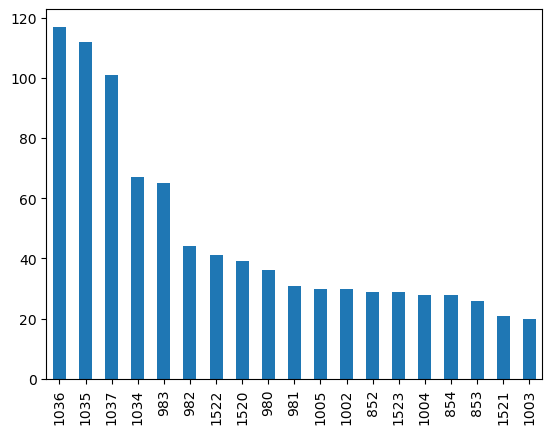

In [87]:
# grafico de barras
df['LojaID'].value_counts(ascending = False).plot.bar()

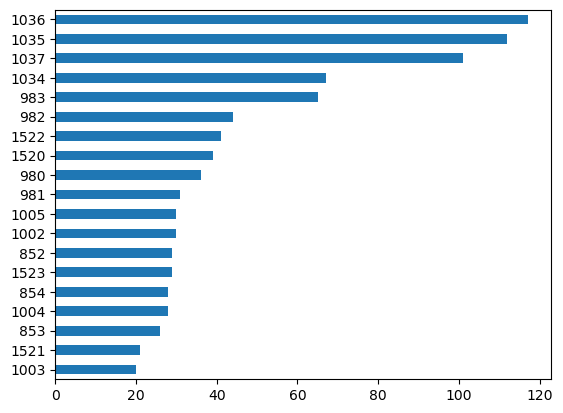

In [95]:
# barras horizontais
df['LojaID'].value_counts(ascending = True).plot.barh();

<AxesSubplot:ylabel='Receita'>

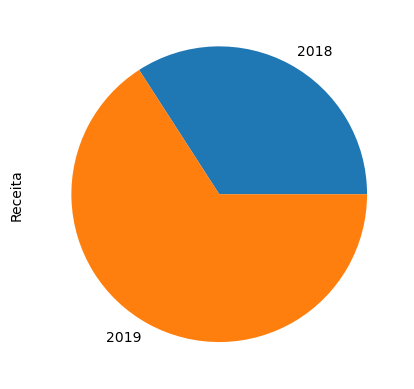

In [100]:
# por data em modelo pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [101]:
# total de vendas por cidades
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

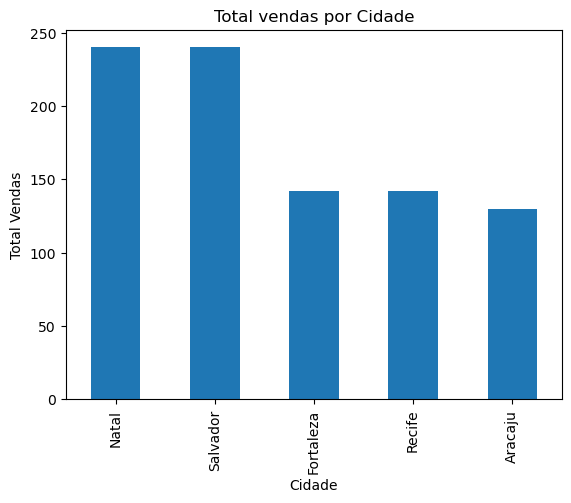

In [110]:
# adcionando um titulo e alterando o nome dos eixos

import matplotlib.pyplot as plt

df['Cidade'].value_counts().plot.bar(title = 'Total vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

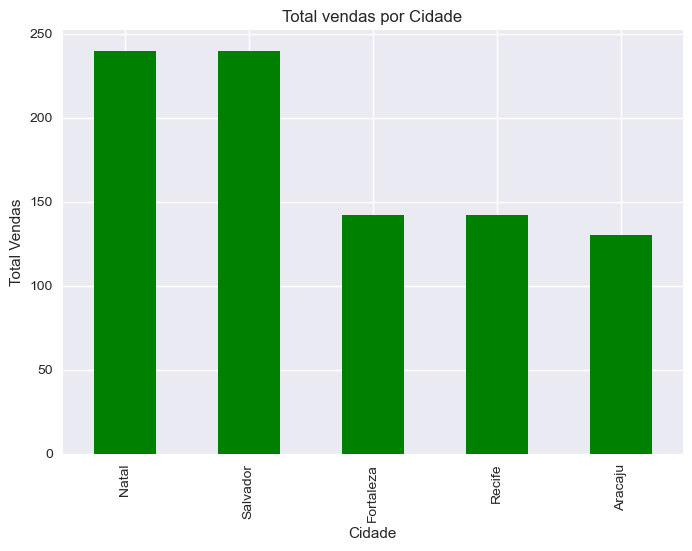

In [155]:
# alterando a cor

df['Cidade'].value_counts().plot.bar(title = 'Total vendas por Cidade', color='green')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [154]:
# alterando o estilo
plt.style.use('seaborn')

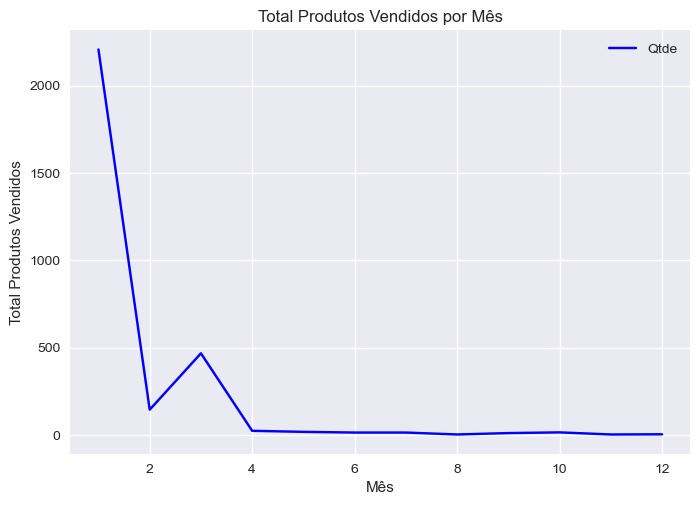

In [156]:
df.groupby(df["mes_venda"])['Qtde'].sum().plot(title = 'Total Produtos Vendidos por Mês', color = 'Blue')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()

In [129]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [136]:
# selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]

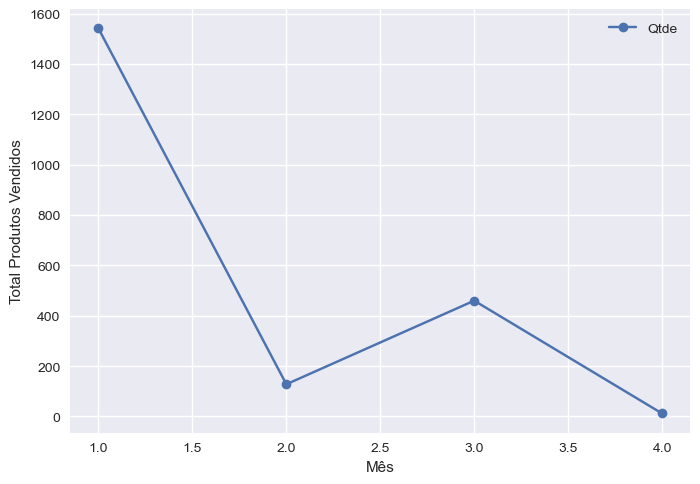

In [157]:
# total de produtos vendidos por mês com marcador 'o' (pode ser vários, v, *)
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend();

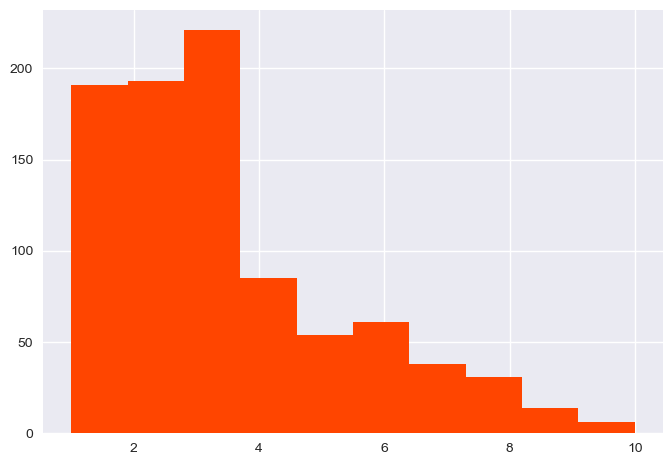

In [158]:
# hisograma
plt.hist(df['Qtde'], color = 'orangered');

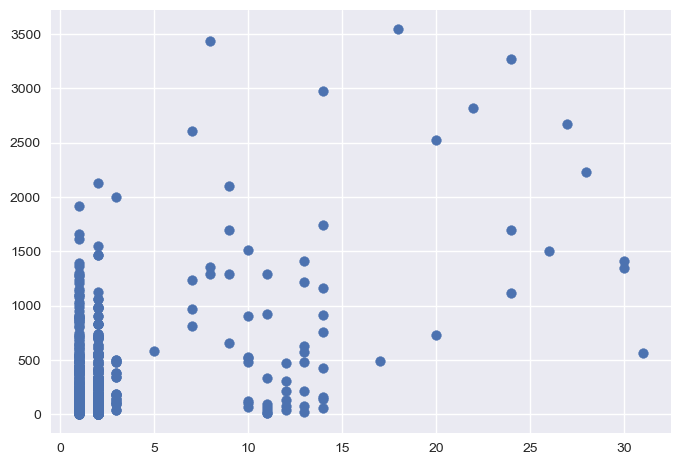

In [159]:
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita'])

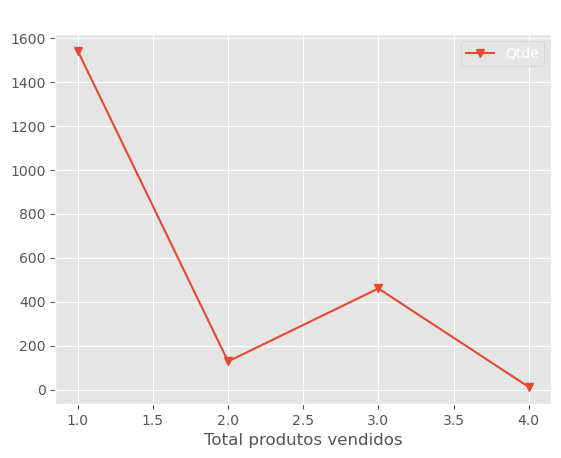

In [153]:
# salvando em PNG

df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quant de produtos vendidos x mês')
plt.xlabel('Mês')
plt.xlabel('Total produtos vendidos');
plt.legend()
plt.savefig('grafico QTDE x MES.png')